**Important**: Click on "*Kernel*" > "*Restart Kernel and Clear All Outputs*" *before* reading this chapter in [JupyterLab <img height="12" style="display: inline-block" src="static/link_to_jp.png">](https://jupyterlab.readthedocs.io/en/stable/) (e.g., in the cloud on [MyBinder <img height="12" style="display: inline-block" src="static/link_to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/master?urlpath=lab/tree/04_iteration_00_content.ipynb))

# Chapter 4: Recursion & Looping

While controlling the flow of execution with an `if` statement is a must-have building block in any programming language, it alone does not allow us to run a block of code repetitively, and we need to be able to do precisely that to write useful software.

The `for` statement shown in some examples before might be the missing piece in the puzzle. However, we can live without it and postpone its official introduction until the second half of this chapter.

Instead, we dive into the big idea of **iteration** by studying the concept of **recursion** first. This order is opposite to many other introductory books that only treat the latter as a nice-to-have artifact, if at all. Yet, understanding recursion sharpens one's mind and contributes to seeing problems from a different angle.

## Recursion

A popular joke among programmers by an unknown author goes like this (cf., [discussion](https://www.quora.com/What-does-the-phrase-in-order-to-understand-recursion-you-must-first-understand-recursion-mean-to-you)):

> "In order to understand **recursion**, you must first understand **recursion**."

A function that calls itself is **recursive**, and the process of executing such a function is called **recursion**.

Recursive functions contain some form of a conditional check (e.g., `if` statement) to identify a **base case** that ends the recursion *when* reached. Otherwise, the function would keep calling itself forever.

The meaning of the word *recursive* is similar to *circular*. However, a truly circular definition is not very helpful, and we think of a recursive function as kind of a "circular function with a way out at the end."

#### Trivial Example: Countdown

A rather trivial toy example illustrates the important aspects concretely: If called with any positive integer as its `n` argument, `countdown()` just prints that number and calls itself with the *new* `n` being the *old* `n` minus `1`. This continues until `countdown()` is called with `n=0`. Then, the flow of execution hits the base case, and the function calls stop.

In [1]:
def countdown(n):
    """Print a countdown until the party starts.

    Args:
        n (int): seconds until the party begins
    """
    if n == 0:
        print("Happy New Year!")
    else:
        print(n)
        countdown(n - 1)

In [2]:
countdown(3)

3
2
1
Happy New Year!


As trivial as this seems, a lot of complexity is hidden in this implementation. In particular, the order in which objects are created and de-referenced in memory might not be apparent right away as [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=def%20countdown%28n%29%3A%0A%20%20%20%20if%20n%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20print%28%22Happy%20new%20Year!%22%29%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20print%28n%29%0A%20%20%20%20%20%20%20%20countdown%28n%20-%201%29%0A%0Acountdown%283%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows: Each time `countdown()` is called, Python creates a *new* frame in the part of the memory where it manages all the names. This way, Python *isolates* all the different `n` variables from each other. As new frames are created until we reach the base case, after which the frames are destroyed in the *reversed* order, this is called a **[stack <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Stack_(abstract_data_type))** of frames in computer science terminology. In simple words, a stack is a last-in-first-out (LIFO) task queue. Each frame has a single parent frame, namely the one whose recursive function call created it.

### Recursion in Mathematics

Recursion plays a vital role in mathematics as well, and we likely know about it from some introductory course, for example, in [combinatorics <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Combinatorics).

#### Easy Example: [Factorial <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Factorial)

The factorial function, denoted with the $!$ symbol, is defined as follows for all non-negative integers:

$$0! = 1$$
$$n! = n*(n-1)!$$

Whenever we find a recursive way of formulating an idea, we can immediately translate it into Python in a *naive* way (i.e., we create a *correct* program that may *not* be an *efficient* implementation yet).

Below is a first version of `factorial()`: The `return` statement does not have to be a function's last code line, and we may indeed have several `return` statements as well.

In [3]:
def factorial(n):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for

    Returns:
        factorial (int)
    """
    if n == 0:
        return 1
    else:
        recurse = factorial(n - 1)
        result = n * recurse
        return result

When we read such code, it is often easier not to follow every function call (i.e., `factorial(n - 1)` here) in one's mind but assume we receive a return value as specified in the documentation. Some call this approach a **[leap of faith](http://greenteapress.com/thinkpython2/html/thinkpython2007.html#sec75)**. We practice this already whenever we call built-in functions (e.g., [print() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#print) or [len() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#len)) where we would have to read C code in many cases.

To visualize *all* the computational steps of the exemplary `factorial(3)`, we use [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=def%20factorial%28n%29%3A%0A%20%20%20%20if%20n%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20recurse%20%3D%20factorial%28n%20-%201%29%0A%20%20%20%20%20%20%20%20result%20%3D%20n%20*%20recurse%0A%20%20%20%20%20%20%20%20return%20result%0A%0Asolution%20%3D%20factorial%283%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false): The recursion again creates a stack of frames in memory. In contrast to the previous trivial example, each frame leaves a return value in memory after it is destroyed. This return value is then assigned to the `recurse` variable within the parent frame and used to compute `result`.

In [4]:
factorial(3)

6

In [5]:
factorial(10)

3628800

A Pythonista would formulate `factorial()` in a more concise way using the so-called **early exit** pattern: No `else`-clause is needed as reaching a `return` statement ends a function call *immediately*. Furthermore, we do not need the temporary variables `recurse` and `result`.

As [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=def%20factorial%28n%29%3A%0A%20%20%20%20if%20n%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20return%20n%20*%20factorial%28n%20-%201%29%0A%0Asolution%20%3D%20factorial%283%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows, this implementation is more efficient as it only requires 18 computational steps instead of 24 to calculate `factorial(3)`, an improvement of 25 percent! 

In [6]:
def factorial(n):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for

    Returns:
        factorial (int)
    """
    if n == 0:
        return 1
    return n * factorial(n - 1)

In [7]:
factorial(3)

6

In [8]:
factorial(10)

3628800

Note that the [math <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) provides a [factorial() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html#math.factorial) function as well, and we should, therefore, *never* implement it ourselves in a real codebase.

In [9]:
import math

In [10]:
help(math.factorial)

Help on built-in function factorial in module math:

factorial(x, /)
    Find x!.
    
    Raise a ValueError if x is negative or non-integral.



In [11]:
math.factorial(3)

6

In [12]:
math.factorial(10)

3628800

#### "Involved" Example: [Euclid's Algorithm <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Euclidean_algorithm)

As famous philosopher Euclid already shows in his "Elements" (ca. 300 BC), the greatest common divisor of two integers, i.e., the largest number that divides both integers without a remainder, can be efficiently computed with the following code. This example illustrates that a recursive solution to a problem is not always easy to understand.

In [13]:
def gcd(a, b):
    """Calculate the greatest common divisor of two numbers.

    Args:
        a (int): first number
        b (int): second number

    Returns:
        gcd (int)
    """
    if b == 0:
        return a 
    return gcd(b, a % b)

In [14]:
gcd(12, 4)

4

Euclid's algorithm is stunningly fast, even for large numbers. Its speed comes from the use of the modulo operator `%`. However, this is *not* true for recursion in general, which may result in slow programs if not applied correctly.

In [15]:
gcd(112233445566778899, 987654321)

9

As expected, for two [prime numbers <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/List_of_prime_numbers) the greatest common divisor is of course $1$.

In [16]:
gcd(7, 7919)

1

The [math <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html) module in the [standard library <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/index.html) provides a [gcd() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/math.html#math.gcd) function as well, and, therefore, we should again *never* implement it on our own.

In [17]:
help(math.gcd)

Help on built-in function gcd in module math:

gcd(x, y, /)
    greatest common divisor of x and y



In [18]:
math.gcd(12, 4)

4

In [19]:
math.gcd(112233445566778899, 987654321)

9

In [20]:
math.gcd(7, 7919)

1

#### "Easy at first Glance" Example: [Fibonacci Numbers <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Fibonacci_number)

The Fibonacci numbers are an infinite sequence of non-negative integers that are calculated such that every number is the sum of its two predecessors where the first two numbers of the sequence are defined to be $0$ and $1$. For example, the first 13 numbers are:

$0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144$

Let's write a function `fibonacci()` that calculates the $i$th Fibonacci number where $0$ is the $0$th number. Looking at the numbers in a **backward** fashion (i.e., from right to left), we realize that the return value for `fibonacci(i)` can be reduced to the sum of the return values for `fibonacci(i - 1)` and `fibonacci(i - 2)` disregarding the *two* base cases.

In [21]:
def fibonacci(i):
    """Calculate the ith Fibonacci number.

    Args:
        i (int): index of the Fibonacci number to calculate

    Returns:
        ith_fibonacci (int)
    """
    if i == 0:
        return 0
    elif i == 1:
        return 1
    return fibonacci(i - 1) + fibonacci(i - 2)

In [22]:
fibonacci(12)  # = 13th number

144

##### Efficiency of Algorithms

This implementation is *highly* **inefficient** as small Fibonacci numbers already take a very long time to compute. The reason for this is **exponential growth** in the number of function calls. As [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=def%20fibonacci%28i%29%3A%0A%20%20%20%20if%20i%20%3D%3D%200%3A%0A%20%20%20%20%20%20%20%20return%200%0A%20%20%20%20elif%20i%20%3D%3D%201%3A%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20return%20fibonacci%28i%20-%201%29%20%2B%20fibonacci%28i%20-%202%29%0A%0Arv%20%3D%20fibonacci%285%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows, `fibonacci()` is called again and again with the same `i` arguments.

To understand this in detail, we have to study algorithms and data structures (e.g., with [this book](https://www.amazon.de/Introduction-Algorithms-Press-Thomas-Cormen/dp/0262033844/ref=sr_1_1?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=1JNE8U0VZGU0O&qid=1569837169&s=gateway&sprefix=algorithms+an%2Caps%2C180&sr=8-1)), a discipline within computer science, and dive into the analysis of **[time complexity of algorithms <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Time_complexity)**.

Luckily, in the Fibonacci case, the inefficiency can be resolved with a **caching** (i.e., "reuse") strategy from the field of **[dynamic programming <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Dynamic_programming)**, namely **[memoization <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Memoization)**. We do so in [Chapter 9 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/09_mappings_00_content.ipynb#Memoization), after introducing the `dict` data type.

Let's measure the average run times for `fibonacci()` and varying `i` arguments with the `%%timeit` [cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) that comes with Jupyter.

In [23]:
%%timeit -n 100
fibonacci(12)

36.9 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%%timeit -n 100
fibonacci(24)

11.2 ms ± 52.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%%timeit -n 1 -r 1
fibonacci(36)

3.67 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
%%timeit -n 1 -r 1
fibonacci(37)

5.86 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Infinite Recursion

If a recursion does not reach its base case, it theoretically runs forever. Luckily, Python detects that and saves the computer from crashing by raising a `RecursionError`.

The simplest possible infinite recursion is generated like so.

In [27]:
def run_forever():
    """Also a pointless function should have a docstring."""
    run_forever()

In [28]:
run_forever()

RecursionError: maximum recursion depth exceeded

However, even the trivial `countdown()` function from above is not immune to infinite recursion. Let's call it with `3.1` instead of `3`. What goes wrong here?

In [29]:
countdown(3.1)

3.1
2.1
1.1
0.10000000000000009
-0.8999999999999999
-1.9
-2.9
-3.9
-4.9
-5.9
-6.9
-7.9
-8.9
-9.9
-10.9
-11.9
-12.9
-13.9
-14.9
-15.9
-16.9
-17.9
-18.9
-19.9
-20.9
-21.9
-22.9
-23.9
-24.9
-25.9
-26.9
-27.9
-28.9
-29.9
-30.9
-31.9
-32.9
-33.9
-34.9
-35.9
-36.9
-37.9
-38.9
-39.9
-40.9
-41.9
-42.9
-43.9
-44.9
-45.9
-46.9
-47.9
-48.9
-49.9
-50.9
-51.9
-52.9
-53.9
-54.9
-55.9
-56.9
-57.9
-58.9
-59.9
-60.9
-61.9
-62.9
-63.9
-64.9
-65.9
-66.9
-67.9
-68.9
-69.9
-70.9
-71.9
-72.9
-73.9
-74.9
-75.9
-76.9
-77.9
-78.9
-79.9
-80.9
-81.9
-82.9
-83.9
-84.9
-85.9
-86.9
-87.9
-88.9
-89.9
-90.9
-91.9
-92.9
-93.9
-94.9
-95.9
-96.9
-97.9
-98.9
-99.9
-100.9
-101.9
-102.9
-103.9
-104.9
-105.9
-106.9
-107.9
-108.9
-109.9
-110.9
-111.9
-112.9
-113.9
-114.9
-115.9
-116.9
-117.9
-118.9
-119.9
-120.9
-121.9
-122.9
-123.9
-124.9
-125.9
-126.9
-127.9
-128.9
-129.9
-130.9
-131.9
-132.9
-133.9
-134.9
-135.9
-136.9
-137.9
-138.9
-139.9
-140.9
-141.9
-142.9
-143.9
-144.9
-145.9
-146.9
-147.9
-148.9
-149.9
-150.9
-151.9

RecursionError: maximum recursion depth exceeded while calling a Python object

In the same way, a `RecursionError` occurs if we call `factorial()` with `3.1` instead of `3`.

In [30]:
factorial(3.1)

RecursionError: maximum recursion depth exceeded in comparison

The infinite recursions could easily be avoided by replacing `n == 0` with `n <= 0` in both functions and thereby **generalizing** them. However, even then, calling either `countdown()` or `factorial()` with a non-integer number is still *semantically* wrong.

Errors as above are a symptom of missing **type checking**: By design, Python allows us to pass in not only integers but objects of any type as arguments to the `countdown()` and `factorial()` functions. As long as the arguments "behave" like integers, we do not encounter any *runtime* errors. This is the case here as the two example functions only use the `-` and `*` operators internally, and, in the context of arithmetic, a `float` object behaves like an `int` object. So, the functions keep calling themselves until Python decides with a built-in heuristic that the recursion is likely not going to end and aborts the computations with a `RecursionError`. Strictly speaking, a `RecursionError` is, of course, a *runtime* error as well.

### Duck Typing

The missing type checking is *100% intentional* and considered a **[feature of rather than a bug](https://www.urbandictionary.com/define.php?term=It%27s%20not%20a%20bug%2C%20it%27s%20a%20feature)** in Python!

Pythonistas use the "technical" term **[duck typing <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Duck_typing)** to express the idea of two objects of *different* types behaving in the *same* way in a given context. The colloquial saying goes, "If it walks like a duck and it quacks like a duck, it must be a duck."

For example, we could call `factorial()` with the `float` object `3.0`, and the recursion works out fine. So, because the `3.0` "walks" and "quacks" like a `3`, it "must be" a `3`.

In [31]:
factorial(3.0)

6.0

In [32]:
factorial(3)

6

We see similar behavior when we mix objects of types `int` and `float` with arithmetic operators. For example, `1 + 2.0` works because Python implicitly views the `1` as a `1.0` at runtime and then knows how to do floating-point arithmetic: Here, the `int` "walks" and "quacks" like a `float`.

In [33]:
1 + 2.0

3.0

In [34]:
1.0 + 2.0

3.0

The important lesson is that we must expect our functions to be called with objects of *any* type at runtime, as opposed to the one type we had in mind when defining the function.

Duck typing is possible because Python is a dynamically typed language. On the contrary, in statically typed languages like C, we *must* declare (i.e., "specify") the data type of every parameter in a function definition. Then, a `RecursionError` as for `countdown(3.1)` or `factorial(3.1)` above could not occur. For example, if we declared the `countdown()` and `factorial()` functions to only accept `int` objects, calling the functions with a `float` argument would immediately fail *syntactically*. As a downside, we would then lose the ability to call `factorial()` with `3.0`, which is *semantically* correct nevertheless.

So, there is no black or white answer as to which of the two language designs is better. Yet, most professional programmers have strong opinions concerning duck typing, reaching from "love" to "hate." This is another example of how programming is a subjective art rather than "objective" science. Python's design is probably more appealing to beginners who intuitively regard `3` and `3.0` as interchangeable.

### Type Checking & Input Validation

We use the built-in [isinstance() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#isinstance) function to make sure `factorial()` is called with an `int` object as the argument. We further **validate** the **input** by verifying that the integer is non-negative.

Meanwhile, we also see how we manually raise exceptions with the `raise` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/simple_stmts.html#the-raise-statement)), another way of controlling the flow of execution.

The first two branches in the revised `factorial()` function act as **guardians** ensuring that the code does not produce *unexpected* runtime errors: Errors may be expected when mentioned in the docstring.

So, in essence, we are doing *two* things here: Besides checking the type, we also enforce **domain-specific** (i.e., mathematical here) rules concerning the non-negativity of `n`.

In [35]:
def factorial(n):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for; must be positive

    Returns:
        factorial (int)

    Raises:
        TypeError: if n is not an integer
        ValueError: if n is negative
    """
    if not isinstance(n, int):
        raise TypeError("Factorial is only defined for integers")
    elif n < 0:
        raise ValueError("Factorial is not defined for negative integers")
    elif n == 0:
        return 1
    return n * factorial(n - 1)

The revised `factorial()` function works like the old one.

In [36]:
factorial(0)

1

In [37]:
factorial(3)

6

Instead of running into a situation of infinite recursion, we now receive specific error messages.

In [38]:
factorial(3.1)

TypeError: Factorial is only defined for integers

In [39]:
factorial(-42)

ValueError: Factorial is not defined for negative integers

Forcing `n` to be an `int` is a very puritan way of handling the issues discussed above. So, we can *not* call `factorial()` with, for example, `3.0`.

In [40]:
factorial(3.0)

TypeError: Factorial is only defined for integers

### Type Casting

A similar way to prevent an infinite recursion is to **cast** the **type** of the `n` argument with the built-in [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int) constructor.

In [41]:
def factorial(n):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for; must be positive

    Returns:
        factorial (int)

    Raises:
        TypeError: if n cannot be cast as an integer
        ValueError: if n is negative
    """
    n = int(n)
    if n < 0:
        raise ValueError("Factorial is not defined for negative integers")
    elif n == 0:
        return 1
    return n * factorial(n - 1)

The not so strict type casting implements duck typing for `factorial()` as, for example, `3.0` "walks" and "quacks" like a `3`.

In [42]:
factorial(3)

6

In [43]:
factorial(3.0)

6

However, if we now call `factorial()` with a non-integer `float` object like `3.1`, *no* error is raised. This is a potential source for *semantic* errors as the function runs for invalid input.

In [44]:
factorial(3.1)

6

We could adjust the type casting logic such that a `TypeError` is raised for `n` arguments with non-zero decimals. 

In [45]:
def factorial(n):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for; must be positive

    Returns:
        factorial (int)

    Raises:
        TypeError: if n cannot be cast as an integer
        ValueError: if n is negative
    """
    if n != int(n):
        raise TypeError("n is not integer-like; it has non-zero decimals")
    n = int(n)

    if n < 0:
        raise ValueError("Factorial is not defined for negative integers")
    elif n == 0:
        return 1
    return n * factorial(n - 1)

In [46]:
factorial(3.0)

6

In [47]:
factorial(3.1)

TypeError: n is not integer-like; it has non-zero decimals

However, using built-in constructors for type casting leads to another subtle inconsistency. As constructors are designed to take *any* object as their argument, they do not raise a `TypeError` when called with invalid input but a `ValueError` instead. So, if we, for example, called `factorial()` with `"text"` as the `n` argument, we see the `ValueError` raised by [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int) in a situation where a `TypeError` would be more appropriate.

In [48]:
factorial("text")

ValueError: invalid literal for int() with base 10: 'text'

We could, of course, use a `try` statement to suppress the exceptions raised by [int() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#int) and replace them with a custom `TypeError`. However, now the implementation as a whole is more about type checking than about the actual logic solving the problem. We took this example to the extreme on purpose. In practice, we rarely see such code!

In [49]:
def factorial(n):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for; must be positive

    Returns:
        factorial (int)

    Raises:
        TypeError: if n cannot be cast as an integer
        ValueError: if n is negative
    """
    try:
        casted_n = int(n)
    except ValueError:
        raise TypeError("n cannot be casted as an integer") from None
    else:
        if n != casted_n:
            raise TypeError("n is not integer-like; it has non-zero decimals")
        n = casted_n

    if n < 0:
        raise ValueError("Factorial is not defined for negative integers")
    elif n == 0:
        return 1
    return n * factorial(n - 1)

In [50]:
factorial("text")

TypeError: n cannot be casted as an integer

In [51]:
factorial(3.1)

TypeError: n is not integer-like; it has non-zero decimals

Which way we choose for **hardening** the `factorial()` function depends on the concrete circumstances. If we are the main caller of the function ourselves, we may choose to *not* do any of the approaches at all. After all, we should be able to call our own function in the correct way. The lesson is that just because Python has no static typing, this does *not* mean that we cannot do this "manually." Yet, the idea behind a dynamically typed language is to *not* deal with the types too much at all.

### Theory of Computation

With everything *officially* introduced so far, Python would be what is called **[Turing complete <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Turing_completeness)**. That means that anything that could be formulated as an algorithm could be expressed with all the language features we have seen. Note that, in particular, we have *not* yet formally *introduced* the `for` and `while` statements!

## Looping

### The `while` Statement

Whereas functions combined with `if` statements suffice to model any repetitive logic, Python comes with a compound `while` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/compound_stmts.html#the-while-statement)) that often makes it easier to implement iterative ideas.

It consists of a header line with a boolean expression followed by an indented code block. Before the first and after every execution of the code block, the boolean expression is evaluated, and if it is (still) equal to `True`, the code block runs (again). Eventually, some variable referenced in the boolean expression is changed in the code block such that the condition becomes `False`.

If the condition is `False` before the first iteration, the entire code block is *never* executed. As the flow of control keeps "**looping**" (i.e., more formally, **iterating**) back to the beginning of the code block, this concept is also called a `while`-loop and each pass through the loop an **iteration**.

#### Trivial Example: Countdown (revisited)

Let's rewrite the `countdown()` example in an iterative style. We also build in **input validation** by allowing the function only to be called with strictly positive integers. As any positive integer hits $0$ at some point when iteratively decremented by $1$, `countdown()` is guaranteed to **terminate**. Also, the base case is now handled at the end of the function, which commonly happens with iterative solutions to problems.

In [52]:
def countdown(n):
    """Print a countdown until the party starts.

    Args:
        n (int): seconds until the party begins; must be positive
    """
    while n != 0:
        print(n)
        n -= 1

    print("Happy new Year!")

In [53]:
countdown(3)

3
2
1
Happy new Year!


As [PythonTutor <img height="12" style="display: inline-block" src="static/link_to_py.png">](http://pythontutor.com/visualize.html#code=def%20countdown%28n%29%3A%0A%20%20%20%20while%20n%20!%3D%200%3A%0A%20%20%20%20%20%20%20%20print%28n%29%0A%20%20%20%20%20%20%20%20n%20-%3D%201%0A%0A%20%20%20%20print%28%22Happy%20new%20Year!%22%29%0A%0Acountdown%283%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false) shows, there is a subtle but essential difference in the way a `while` statement is treated in memory: In short, `while` statements can *not* run into a `RecursionError` as only *one* frame is needed to manage the names. After all, there is only *one* function call to be made. For typical day-to-day applications, this difference is, however, not so important *unless* a problem instance becomes so big that a large (i.e., $> 3.000$) number of recursive calls must be made.

#### "Still involved" Example: [Euclid's Algorithm <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Euclidean_algorithm) (revisited)

Finding the greatest common divisor of two numbers is still not so obvious when using a `while`-loop instead of a recursive formulation.

The iterative implementation of `gcd()` below accepts any two strictly positive integers. As in any iteration through the loop, the smaller number is subtracted from the larger one, the two decremented values of `a` and `b` eventually become equal. Thus, this algorithm is also guaranteed to terminate. If one of the two numbers were negative or $0$ in the first place, `gcd()` would run forever, and not even Python could detect this. Try this out by removing the input validation and running the function with negative arguments!

In [54]:
def gcd(a, b):
    """Calculate the greatest common divisor of two numbers.

    Args:
        a (int): first number; must be positive
        b (int): second number; must be positive

    Returns:
        gcd (int)
    """
    while a != b:
        if a > b:
            a -= b
        else:
            b -= a

    return a

In [55]:
gcd(12, 4)

4

In [56]:
gcd(7, 7919)

1

##### Efficiency of Algorithms (continued)

We also see that this implementation is a lot *less* efficient than its recursive counterpart which solves `gcd()` for the same two numbers `112233445566778899` and `987654321` within microseconds.

In [57]:
%%timeit -n 1 -r 1
gcd(112233445566778899, 987654321)

5.12 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Infinite Loops

As with recursion, we must ensure that the iteration ends. For the above `countdown()` and `gcd()` examples, we could "prove" (i.e., at least argue in favor) that some pre-defined **termination criterion** is reached eventually. However, this cannot be done in all cases, as the following example shows.

#### "Mystery" Example: [Collatz Conjecture <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Collatz_conjecture)

Let's play the following game:
- Think of any positive integer $n$.
- If $n$ is even, the next $n$ is half the old $n$.
- If $n$ is odd, multiply the old $n$ by $3$ and add $1$ to obtain the next $n$.
- Repeat these steps until you reach $1$.

**Do we always reach the final $1$?**

The function below implements this game. Does it always reach $1$? No one has proven it so far! We include some input validation as before because `collatz()` would for sure not terminate if we called it with a negative number. Further, the Collatz sequence also works for real numbers, but then we would have to study fractals (cf., [this <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Collatz_conjecture#Iterating_on_real_or_complex_numbers)). So we restrict our example to integers only.

In [58]:
def collatz(n):
    """Print a Collatz sequence in descending order.

    Given a positive integer n, modify it according to these rules:
        - if n is even, the next n is half the previous one
        - if n is odd, the next n is 3 times the previous one plus 1
        - if n is 1, stop the iteration

    Args:
        n (int): a positive number to start the Collatz sequence at
    """
    while n != 1:
        print(n, end=" ")
        if n % 2 == 0:
            n //= 2  # //= to preserve the int type
        else:
            n = 3 * n + 1

    print(1)

Collatz sequences do not necessarily become longer with a larger initial `n`.

In [59]:
collatz(100)

100 50 25 76 38 19 58 29 88 44 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1


In [60]:
collatz(1000)

1000 500 250 125 376 188 94 47 142 71 214 107 322 161 484 242 121 364 182 91 274 137 412 206 103 310 155 466 233 700 350 175 526 263 790 395 1186 593 1780 890 445 1336 668 334 167 502 251 754 377 1132 566 283 850 425 1276 638 319 958 479 1438 719 2158 1079 3238 1619 4858 2429 7288 3644 1822 911 2734 1367 4102 2051 6154 3077 9232 4616 2308 1154 577 1732 866 433 1300 650 325 976 488 244 122 61 184 92 46 23 70 35 106 53 160 80 40 20 10 5 16 8 4 2 1


In [61]:
collatz(10000)

10000 5000 2500 1250 625 1876 938 469 1408 704 352 176 88 44 22 11 34 17 52 26 13 40 20 10 5 16 8 4 2 1


In [62]:
collatz(100000)

100000 50000 25000 12500 6250 3125 9376 4688 2344 1172 586 293 880 440 220 110 55 166 83 250 125 376 188 94 47 142 71 214 107 322 161 484 242 121 364 182 91 274 137 412 206 103 310 155 466 233 700 350 175 526 263 790 395 1186 593 1780 890 445 1336 668 334 167 502 251 754 377 1132 566 283 850 425 1276 638 319 958 479 1438 719 2158 1079 3238 1619 4858 2429 7288 3644 1822 911 2734 1367 4102 2051 6154 3077 9232 4616 2308 1154 577 1732 866 433 1300 650 325 976 488 244 122 61 184 92 46 23 70 35 106 53 160 80 40 20 10 5 16 8 4 2 1


### The `for` Statement

Recursion and the `while` statement are two sides of the same coin. Disregarding that in the case of recursion Python internally faces some additional burden for managing the stack of frames in memory, both approaches lead to the *same* computational steps in memory. More importantly, we can formulate any recursive implementation in an iterative way and vice versa despite one of the two ways often "feeling" a lot more natural given a particular problem.

So how does the compound `for` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/compound_stmts.html#the-for-statement)) in this book's very first example fit into this picture? It is a *redundant* language construct to provide a *shorter* and more *convenient* syntax for common applications of the `while` statement. In programming, such additions to a language are called **syntactic sugar**. A cup of tea tastes better with sugar, but we may drink tea without sugar too.

Consider `elements` below. Without the `for` statement, we must manage a temporary **index variable**, `index`, to loop over all the elements and also obtain the individual elements with the `[]` operator in each iteration of the loop.

In [63]:
elements = [0, 1, 2, 3, 4]

In [64]:
index = 0

while index < len(elements):
    element = elements[index]
    print(element, end=" ")
    index += 1

del index

0 1 2 3 4 

The `for` statement, on the contrary, makes the actual business logic more apparent by stripping all the **[boilerplate code <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Boilerplate_code)** away. The variable that is automatically set by Python in each iteration of the loop (i.e., `element` in the example) is called the **target variable**.

In [65]:
for element in elements:
    print(element, end=" ")

0 1 2 3 4 

For sequences of integers, the [range() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-range) built-in makes the `for` statement even more convenient: It creates a `list`-like object of type `range` that generates integers "on the fly," and we look closely at the underlying effects in memory in [Chapter 8 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/08_mfr_00_content.ipynb#Mapping).

In [66]:
for element in range(5):
    print(element, end=" ")

0 1 2 3 4 

In [67]:
type(range(5))

range

[range() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#func-range) takes optional `start` and `step` arguments that we use to customize the sequence of integers even more.

In [68]:
for element in [1, 3, 5, 7, 9]:
    print(element, end=" ")

1 3 5 7 9 

In [69]:
for element in range(1, 10, 2):
    print(element, end=" ")

1 3 5 7 9 

#### Containers vs. Iterables

The essential difference between the above `list` objects, `[0, 1, 2, 3, 4]` and `[1, 3, 5, 7, 9]`, and the `range` objects, `range(5)` and `range(1, 10, 2)`, is that in the former case *six* objects are created in memory *before* the `for` statement starts running, *one* `list` holding references to *five* `int` objects, whereas in the latter case only *one* `range` object is created that **generates** `int` objects one at a time *while* the `for`-loop runs.

However, we can loop over both of them. So a natural question to ask is why Python treats objects of *different*  types in the *same* way when used with a `for` statement.

So far, the overarching storyline in this book goes like this: In Python, *everything* is an object. Besides its *identity* and *value*, every object is characterized by "belonging" to *one* data type that determines how the object behaves and what we may do with it.

Now, just as we classify objects by data type, we also classify these data types (e.g., `int`, `float`, `str`, or `list`) into **abstract concepts**.

We did this already in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Who-am-I?-And-how-many?) when we described a `list` object as "some sort of container that holds [...] references to other objects". So, abstractly speaking, **containers** are any objects that are "composed" of other objects and also "manage" how these objects are organized. `list` objects, for example, have the property that they model an order associated with their elements. There exist, however, other container types, many of which do *not* come with an order. So, containers primarily "contain" other objects and have *nothing* to do with looping.

On the contrary, the abstract concept of **iterables** is all about looping: Any object that we can loop over is, by definition, an iterable. So, `range` objects, for example, are iterables, even though they hold no references to other objects. Moreover, looping does *not* have to occur in a *predictable* order, although this is the case for both `list` and `range` objects.

Typically, containers are iterables, and iterables are containers. Yet, only because these two concepts coincide often, we must not think of them as the same. In [Chapter 7 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_content.ipynb#Collections-vs.-Sequences), we formalize these two concepts and introduce many more. Finally, [Chapter 10 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/10_classes_00_content.ipynb) gives an explanation how abstract concepts are implemented and play together.

Let's continue with `first_names` below as an example an illustrate what iterable containers are.

In [70]:
first_names = ["Achim", "Berthold", "Carl", "Diedrich", "Eckardt"]

The characteristic operator associated with container types is the `in` operator: It checks if a given object evaluates equal to at least one of the objects in the container. Colloquially, it checks if an object is "contained" in the container. Formally, this operation is called **membership testing**.

In [71]:
"Achim" in first_names

True

In [72]:
"Alexander" in first_names

False

The cell below shows the *exact* workings of the `in` operator: Although `3.0` is *not* contained in `elements`, it evaluates equal to the `3` that is, which is why the following expression evaluates to `True`. So, while we could colloquially say that `elements` "contains" `3.0`, it actually does not.

In [73]:
elements

[0, 1, 2, 3, 4]

In [74]:
3.0 in elements

True

Similarly, the characteristic operation of an iterable type is that it supports being looped over, for example, with the `for` statement.

In [75]:
for name in first_names:
    print(name, end="   ")

Achim   Berthold   Carl   Diedrich   Eckardt   

If we must have an index variable in the loop's body, we use the [enumerate() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#enumerate) built-in that takes an *iterable* as its argument and then generates a "stream" of "pairs" of an index variable, `i` below, and an object provided by the iterable, `name`, separated by a `,`. There is *no* need to ever revert to the `while` statement with an explicitly managed index variable to loop over an iterable object.

In [76]:
for i, name in enumerate(first_names, start=1):
    print(i, ">", name, end="   ")

1 > Achim   2 > Berthold   3 > Carl   4 > Diedrich   5 > Eckardt   

[enumerate() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#enumerate) takes an optional `start` argument.

In [77]:
for i, name in enumerate(first_names, start=1):
    print(i, ">", name, end="   ")

1 > Achim   2 > Berthold   3 > Carl   4 > Diedrich   5 > Eckardt   

The [zip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#zip) built-in allows us to combine the elements of two or more iterables in a *pairwise* fashion: It conceptually works like a zipper for a jacket.

In [78]:
last_names = ["Müller", "Meyer", "Mayer", "Schmitt", "Schmidt"]

In [79]:
for first_name, last_name in zip(first_names, last_names):
    print(first_name, last_name, end="   ")

Achim Müller   Berthold Meyer   Carl Mayer   Diedrich Schmitt   Eckardt Schmidt   

#### "Hard at first Glance" Example: [Fibonacci Numbers <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Fibonacci_number) (revisited)

In contrast to its recursive counterpart, the iterative `fibonacci()` function below is somewhat harder to read. For example, it is not so obvious as to how many iterations through the `for`-loop we need to make when implementing it. There is an increased risk of making an *off-by-one* error. Moreover, we need to track a `temp` variable along.

However, one advantage of calculating Fibonacci numbers in a **forward** fashion with a `for` statement is that we could list the entire sequence in ascending order as we calculate the desired number. To show this, we added `print()` statements in `fibonacci()` below.

We do *not* need to store the index variable in the `for`-loop's header line: That is what the underscore variable `_` indicates; we "throw it away."

In [80]:
def fibonacci(i):
    """Calculate the ith Fibonacci number.

    Args:
        i (int): index of the Fibonacci number to calculate

    Returns:
        ith_fibonacci (int)
    """
    a = 0
    b = 1
    print(a, b, sep=" ", end=" ")  # added for didactical purposes
    for _ in range(i - 1):
        temp = a + b
        a = b
        b = temp
        print(b, end=" ")  # added for didactical purposes

    return b

In [81]:
fibonacci(12)  # = 13th number

0 1 1 2 3 5 8 13 21 34 55 89 144 

144

##### Efficiency of Algorithms (continued)

Another more important advantage is that now we may calculate even big Fibonacci numbers *efficiently*.

In [82]:
fibonacci(99)  # = 100th number

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 308061521170129 498454011879264 806515533049393 1304969544928657 2111485077978050 3416454622906707 5527939700884757 8944394323791464 14472334024676221 23416728348467685 37889062373143906 61305790721611591 99194853094755497 160500643816367088 259695496911122585 420196140727489673 679891637638612258 1100087778366101931 1779979416004714189 2880067194370816120 4660046610375530309 754011380474634642

218922995834555169026

#### Easy Example: [Factorial <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Factorial) (revisited)

The iterative `factorial()` implementation is comparable to its recursive counterpart when it comes to readability. One advantage of calculating the factorial in a forward fashion is that we could track the intermediate `product` as it grows.

In [83]:
def factorial(n):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for, must be positive

    Returns:
        factorial (int)
    """
    product = 1  # because 0! = 1
    for i in range(1, n + 1):
        product *= i
        print(product, end=" ")  # added for didactical purposes

    return product

In [84]:
factorial(3)

1 2 6 

6

In [85]:
factorial(10)

1 2 6 24 120 720 5040 40320 362880 3628800 

3628800

### Customizing `for`- and `while`-loops

This section introduces additional syntax to customize `for` and `while` statements in our code even further. They are mostly syntactic sugar in that they do not change how a program runs but make its code more readable. We illustrate them for the `for` statement only. However, everything presented in this section also works for the `while` statement.

#### Example: Is the square of a number in `[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]` greater than `100`?

Let's say we have a list of `numbers` and want to check if the square of at least one of its elements is greater than `100`. So, conceptually, we are asking the question if a list of numbers as a whole satisfies a certain condition.

In [86]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

A first naive implementation could look like this: We loop over *every* element in `numbers` and set an **indicator variable** `is_above`, initialized as `False`, to `True` once we encounter an element satisfying the condition.

This implementation is *inefficient* as even if the *first* element in `numbers` has a square greater than `100`, we loop until the last element: This could take a long time for a big list.

Moreover, we must initialize `is_above` *before* the `for`-loop and write an `if`-`else`-logic *after* it to check for the result. The actual business logic is *not* conveyed in a clear way.

In [87]:
is_above = False

for number in numbers:
    print(number, end="   ")  # added for didactical purposes
    if number ** 2 > 100:
        is_above = True

if is_above:
    print("=>   at least one number satisfies the condition")
else:
    print("=>   no number satisfies the condition")

7   11   8   5   3   12   2   6   9   10   1   4   =>   at least one number satisfies the condition


#### The `break` Statement

Python provides the `break` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/simple_stmts.html#the-break-statement)) that lets us stop a loop prematurely at any iteration. It is yet another means of controlling the flow of execution, and we say that we "break out of a loop."

In [88]:
is_above = False

for number in numbers:
    print(number, end="   ")  # added for didactical purposes
    if number ** 2 > 100:
        is_above = True
        break

if is_above:
    print("=>   at least one number satisfies the condition")
else:
    print("=>   no number satisfies the condition")

7   11   =>   at least one number satisfies the condition


This is a computational improvement. However, the code still consists of *three* sections: Some initialization *before* the `for`-loop, the loop itself, and some finalizing logic. We prefer to convey the program's idea in *one* compound statement instead.

#### The `else`-clause

To express the logic in a prettier way, we add an `else`-clause at the end of the `for`-loop (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/compound_stmts.html#the-for-statement)). The `else`-clause is executed *only if* the `for`-loop is *not* stopped with a `break` statement *prematurely* (i.e., *before* reaching the *last* iteration in the loop). The word "else" implies a somewhat unintuitive meaning and may have better been named a `then`-clause. In most use cases, however, the `else`-clause logically goes together with some `if` statement in the loop's body.

Overall, the code's expressive power increases. Not many programming languages support an optional `else`-branching for the `for` and `while` statements, which turns out to be very useful in practice.

In [89]:
for number in numbers:
    print(number, end="   ")  # added for didactical purposes
    if number ** 2 > 100:
        is_above = True
        break
else:
    is_above = False

if is_above:
    print("=>   at least one number satisfies the condition")
else:
    print("=>   no number satisfies the condition")

7   11   =>   at least one number satisfies the condition


Lastly, we incorporate the finalizing `if`-`else` logic into the `for`-loop, avoiding the `is_above` variable altogether.

In [90]:
for number in numbers:
    print(number, end="   ")  # added for didactical purposes
    if number ** 2 > 100:
        print("=>   at least one number satisfies the condition")
        break
else:
    print("=>   no number satisfies the condition")

7   11   =>   at least one number satisfies the condition


Of course, if we choose the number an element's square has to pass to be larger, for example, to `200`, we have to loop over all `numbers`. There is *no way* to optimize this **[linear search <img height="12" style="display: inline-block" src="static/link_to_wiki.png">](https://en.wikipedia.org/wiki/Linear_search)** further.

In [91]:
for number in numbers:
    print(number, end="   ")  # added for didactical purposes
    if number ** 2 > 200:
        print("=>   at least one number satisfies the condition")
        break
else:
    print("=>   no number satisfies the condition")

7   11   8   5   3   12   2   6   9   10   1   4   =>   no number satisfies the condition


#### A first Glance at the Map-Filter-Reduce Paradigm

Often, we process some iterable with numeric data, for example, a list of `numbers` as in this book's introductory example in [Chapter 1 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_content.ipynb#Example:-Averaging-all-even-Numbers-in-a-List) or, more realistically, data from a CSV file with many rows and columns.

Processing numeric data usually comes down to operations that may be grouped into one of the following three categories:

- **mapping**: transform a number according to some functional relationship $y = f(x)$
- **filtering**: throw away individual numbers (e.g., statistical outliers in a sample)
- **reducing**: collect individual numbers into summary statistics

We study this **map-filter-reduce** paradigm extensively in [Chapter 8 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/08_mfr_00_content.ipynb) after introducing more advanced data types that are needed to work with "big" data.

Here, we focus on *filtering out* some numbers in a `for`-loop.

#### Example: A simple Filter

Calculate the sum of all even numbers in `[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]` after squaring them and adding `1` to the squares:

- "*all*" => **loop** over an iterable
- "*even*" => **filter** out the odd numbers
- "*square and add $1$*" => apply the **map** $y = f(x) = x^2 + 1$
- "*sum*" => **reduce** the remaining and mapped numbers to their sum

In [92]:
numbers = [7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]

In [93]:
total = 0

for number in numbers:
    if number % 2 == 0:  # only keep even numbers
        square = (number ** 2) + 1
        print(number, "->", square, end="   ")  # added for didactical purposes
        total += square

total

8 -> 65   12 -> 145   2 -> 5   6 -> 37   10 -> 101   4 -> 17   

370

The above code is easy to read as it involves only two levels of indentation.

In general, code gets harder to comprehend the more **horizontal space** it occupies. It is commonly considered good practice to grow a program **vertically** rather than horizontally. Code compliant with [PEP 8 <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://www.python.org/dev/peps/pep-0008/#maximum-line-length) requires us to use *at most* 79 characters in a line!

Consider the next example, whose implementation in code already starts to look unbalanced.

#### Example: Several Filters

Calculate the sum of every third and even number in `[7, 11, 8, 5, 3, 12, 2, 6, 9, 10, 1, 4]` after squaring them and adding `1` to the squares:

- "*every*" => **loop** over an iterable
- "*third*" => **filter** out all numbers except every third
- "*even*" => **filter** out the odd numbers
- "*square and add $1$*" => apply the **map** $y = f(x) = x^2 + 1$
- "*sum*" => **reduce** the remaining and mapped numbers to their sum

In [94]:
total = 0

for i, number in enumerate(numbers, start=1):
    if i % 3 == 0:  # only keep every third number
        if number % 2 == 0:  # only keep even numbers
            square = (number ** 2) + 1
            print(number, "->", square, end="   ")  # added for didactical purposes 
            total += square

total

8 -> 65   12 -> 145   4 -> 17   

227

With already three levels of indentation, less horizontal space is available for the actual code block. Of course, one could flatten the two `if` statements with the logical `and` operator, as shown in [Chapter 3 <img height="12" style="display: inline-block" src="static/link_to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/03_conditionals_00_content.ipynb#The-if-Statement). Then, however, we trade off horizontal space against a more "complex" `if` logic, and this is *not* a real improvement.

#### The `continue` Statement

A Pythonista would instead make use of the `continue` statement (cf., [reference <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/reference/simple_stmts.html#the-continue-statement)) that causes a loop to jump into the next iteration skipping the rest of the code block.

The revised code fragment below occupies more vertical space and less horizontal space: A *good* trade-off.

One caveat is that we need to negate the conditions in the `if` statements. Conceptually, we are now filtering "out" and not "in."

In [95]:
total = 0

for i, number in enumerate(numbers, start=1):
    if i % 3 != 0:  # only keep every third number
        continue
    elif number % 2 != 0:  # only keep even numbers
        continue

    square = (number ** 2) + 1
    print(number, "->", square, end="   ")  # added for didactical purposes 
    total += square

total

8 -> 65   12 -> 145   4 -> 17   

227

This is yet another illustration of why programming is an art. The two preceding code cells do the *same* with *identical* time complexity. However, the latter is arguably easier to read for a human, even more so when the business logic grows beyond two filters.

### Indefinite Loops

Sometimes we find ourselves in situations where we *cannot* know ahead of time how often or until which point in time a code block is to be executed.

#### Example: Guessing a Coin Toss

Let's consider a game where we randomly choose a variable to be either "Heads" or "Tails" and the user of our program has to guess it.

Python provides the built-in [input() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/functions.html#input) function that prints a message to the user, called the **prompt**, and reads in what was typed in response as a `str` object. We use it to process a user's "unreliable" input to our program (i.e., a user might type in some invalid response). Further, we use the [random() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.random) function in the [random <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html) module to model the coin toss.

A popular pattern to approach such **indefinite loops** is to go with a `while True` statement, which on its own would cause Python to enter into an infinite loop. Then, once a particular event occurs, we `break` out of the loop.

Let's look at a first and naive implementation.

In [96]:
import random

In [97]:
random.seed(42)

In [98]:
while True:
    guess = input("Guess if the coin comes up as heads or tails: ")

    if random.random() < 0.5:
        if guess == "heads":
            print("Yes, it was heads")
            break
        else:
            print("Ooops, it was heads")
    else:
        if guess == "tails":
            print("Yes, it was tails")
            break
        else:
            print("Ooops, it was tails")

Guess if the coin comes up as heads or tails:  Heads


Ooops, it was tails


Guess if the coin comes up as heads or tails:  Heads


Ooops, it was heads


Guess if the coin comes up as heads or tails:  heads


Yes, it was heads


This version exhibits two *severe* issues where we should improve on:

1. If a user enters *anything* other than `"heads"` or `"tails"`, for example, `"Heads"` or `"Tails"`, the program keeps running *without* the user knowing about the mistake!
2. The code *intermingles* the coin tossing with the processing of the user's input: Mixing *unrelated* business logic in the *same* code block makes a program harder to read and, more importantly, maintain in the long run.

#### Example: Guessing a Coin Toss (revisited)

Let's refactor the code and make it *modular*.

First, we divide the business logic into two functions `get_guess()` and `toss_coin()` that are controlled from within a `while`-loop.

`get_guess()` not only reads in the user's input but also implements a simple input validation pattern in that the [strip() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html?highlight=__contains__#str.strip) and [lower() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/stdtypes.html?highlight=__contains__#str.lower) methods remove preceding and trailing whitespace and lower case the input ensuring that the user may spell the input in any possible way (e.g., all upper or lower case). Also, `get_guess()` checks if the user entered one of the two valid options. If so, it returns either `"heads"` or `"tails"`; if not, it returns `None`.

In [99]:
def get_guess():
    """Process the user's input.
    
    Returns:
        guess (str / NoneType): either "heads" or "tails"
            if the input can be parsed and None otherwise
    """
    guess = input("Guess if the coin comes up as heads or tails: ")
    # handle frequent cases of "misspelled" user input
    guess = guess.strip().lower()

    if guess in ["heads", "tails"]:
        return guess
    return None

`toss_coin()` models a fair coin toss when called with default arguments.

In [100]:
def toss_coin(p_heads=0.5):
    """Simulate the tossing of a coin.

    Args:
        p_heads (optional, float): probability that the coin comes up "heads";
            defaults to 0.5 resembling a fair coin

    Returns:
        side_on_top (str): "heads" or "tails"
    """
    if random.random() < p_heads:
        return "heads"
    return "tails"

Second, we rewrite the `if`-`else`-logic to handle the case where `get_guess()` returns `None` explicitly: Whenever the user enters something invalid, a warning is shown, and another try is granted. We use the `is` operator and not the `==` operator as `None` is a singleton object.

The `while`-loop takes on the role of **glue code** that manages how other parts of the program interact with each other.

In [101]:
random.seed(42)

In [102]:
while True:
    guess = get_guess()
    result = toss_coin()

    if guess is None:
        print("Make sure to enter your guess correctly!")
    elif guess == result:
        print("Yes, it was", result)
        break
    else:
        print("Ooops, it was", result)

Guess if the coin comes up as heads or tails:  invalid


Make sure to enter your guess correctly!


Guess if the coin comes up as heads or tails:  Heads


Yes, it was heads


Now, the program's business logic is expressed in a clearer way. More importantly, we can now change it more easily. For example, we could make the `toss_coin()` function base the tossing on a probability distribution other than the uniform (i.e., replace the [random.random() <img height="12" style="display: inline-block" src="static/link_to_py.png">](https://docs.python.org/3/library/random.html#random.random) function with another one). In general, modular architecture leads to improved software maintenance.

## TL;DR

**Iteration** is about **running blocks of code repeatedly**.

There are two redundant approaches to achieving that.

First, we combine functions that call themselves with conditional statements. This concept is known as **recursion** and suffices to control the flow of execution in *every* way we desire. For a beginner, this approach of **backward** reasoning might not be intuitive, but it turns out to be a handy tool to have in one's toolbox.

Second, the `while` and `for` statements are alternative and potentially more intuitive ways to express iteration as they correspond to a **forward** reasoning. The `for` statement is **syntactic sugar** that allows rewriting common occurrences of the `while` statement concisely. Python provides the `break` and `continue` statements as well as an optional `else`-clause that make working with the `for` and `while` statements even more convenient.

**Iterables** are any **concrete data types** that support being looped over, for example, with the `for` statement. The idea behind iterables is an **abstract concept** that may or may not be implemented by any given concrete data type. For example, both `list` and `range` objects can be looped over. The `list` type is also a **container** as any given `list` objects "contains" references to other objects in memory. On the contrary, the `range` type does not reference any other object but instead creates *new* `int` objects "on the fly" (i.e., when being looped over).

## Further Resources

A lecture-style **video presentation** of this chapter is integrated below (cf., the [video <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/watch?v=jT6hr4vOJks&list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f) or the entire [playlist <img height="12" style="display: inline-block" src="static/link_to_yt.png">](https://www.youtube.com/playlist?list=PL-2JV1G3J10lQ2xokyQowcRJI5jjNfW7f)).

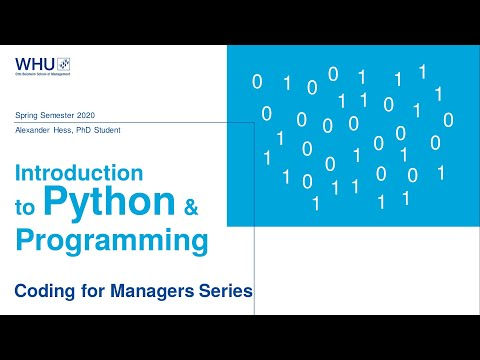

In [103]:
from IPython.display import YouTubeVideo
YouTubeVideo("jT6hr4vOJks", width="60%")